# [SQL Interview Questions on Data Lemur - Easy](https://datalemur.com/questions?difficulty=Easy&category=SQL)

##### Solved by: Dorothy Kunth

### 1. [Histogram of Tweets - Twitter](https://datalemur.com/questions/sql-histogram-tweets)

Assume you're given a table Twitter tweet data, write a query to obtain a histogram of tweets posted per user in 2022. Output the tweet count per user as the bucket and the number of Twitter users who fall into that bucket.

In other words, group the users by the number of tweets they posted in 2022 and count the number of users in each group.

``tweets`` table
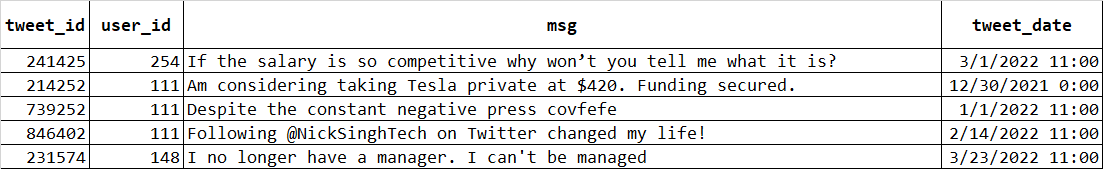

### Solution
1. Query the number of tweets per user in 2022

```sql
SELECT
    user_id,
    COUNT(tweet_id) AS tweet_count
FROM tweets
WHERE tweet_date BETWEEN '01/01/2022' AND '12/31/2022'
GROUP BY 1
```

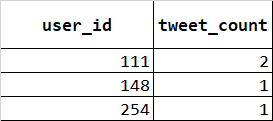

<br><br>
2. Use the above query as an inline query (FROM clause) and use the ``tweet_count`` as bucket then count the number of users per bucket

```sql
SELECT 
  tweet_count AS bucket,
  COUNT(user_id) num_users
FROM (
  SELECT 
   user_id,
   COUNT(tweet_id) AS tweet_count
  FROM tweets
  WHERE tweet_date BETWEEN '01/01/2022' AND '12/31/2022'
  GROUP BY 1) AS tweet_count_per_user
GROUP BY 1
```

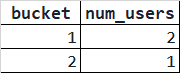

### 2. [Data Science Skills - LinkedIn](https://datalemur.com/questions/matching-skills)

Given a table of candidates and their skills, you're tasked with finding the candidates best suited for an open Data Science job. You want to find candidates who are proficient in Python, Tableau, and PostgreSQL.

Write a query to list the candidates who possess all of the required skills for the job. Sort the output by candidate ID in ascending order.

Assumption: There are no duplicates in the candidates table.

``candidates`` table

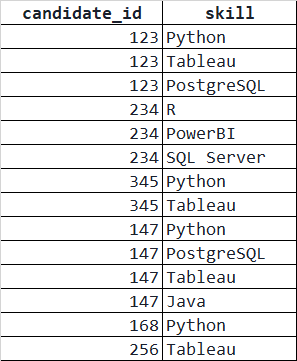

### Solution
1. Select all the candidates that have skills in Python, Tableau, and PostgreSQL

```sql
SELECT *
FROM candidates
WHERE skill IN ('Python', 'Tableau', 'PostgreSQL')
ORDER BY candidate_id
```

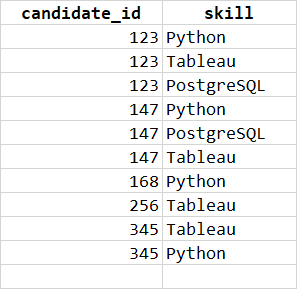

2. Use the above query as an inline query (FROM clause), group by ``candidate_id`` then use HAVING clause to filter only the count of ``skill`` to 3

```sql
SELECT candidate_id
FROM (SELECT *
      FROM candidates
      WHERE skill IN ('Python', 'Tableau', 'PostgreSQL')
      ORDER BY candidate_id) AS skillset
GROUP BY candidate_id
HAVING COUNT(skill) = 3
ORDER BY candidate_id;
```

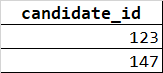

### 3. [Page With No Likes - Facebook](https://datalemur.com/questions/sql-page-with-no-likes)

Assume you're given two tables containing data about Facebook Pages and their respective likes (as in "Like a Facebook Page").

Write a query to return the IDs of the Facebook pages that have zero likes. The output should be sorted in ascending order based on the page IDs.

``pages`` table
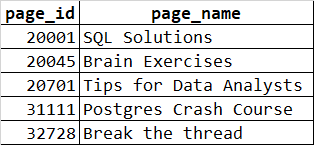

``page_likes`` table
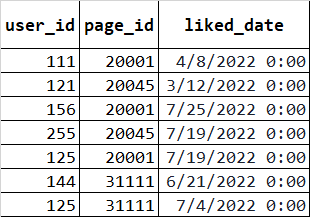

### Solution

```sql
SELECT p.page_id
FROM pages AS p
LEFT JOIN page_likes AS pl 
ON p.page_id = pl.page_id
WHERE liked_date IS NULL
```

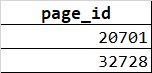

### 4. [Unfinished Parts - Tesla](https://datalemur.com/questions/tesla-unfinished-parts)

Tesla is investigating production bottlenecks and they need your help to extract the relevant data. Write a query to determine which parts have begun the assembly process but are not yet finished.

Assumptions:

- parts_assembly table contains all parts currently in production, each at varying stages of the assembly process.
- An unfinished part is one that lacks a finish_date.

``parts_assembly`` table
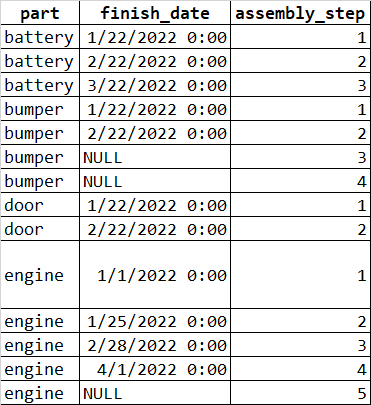

### Solution

```sqll
SELECT part, assembly_step
FROM parts_assembly
WHERE finish_date IS NULL;
```

![image.png](attachment:image.png)

### 5. [Laptop vs. Mobile Viewership - The New York Times](https://datalemur.com/questions/laptop-mobile-viewership)

Assume you're given the table on user viewership categorised by device type where the three types are laptop, tablet, and phone.

Write a query that calculates the total viewership for laptops and mobile devices where mobile is defined as the sum of tablet and phone viewership. Output the total viewership for laptops as laptop_views and the total viewership for mobile devices as mobile_views.

``viewership`` table
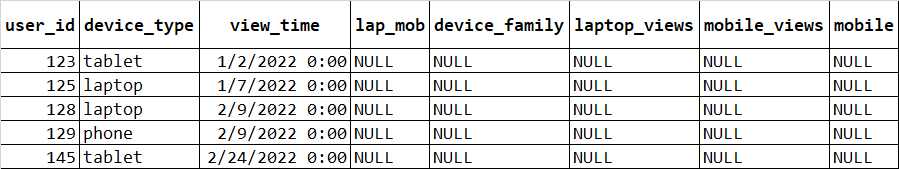

### Solution
1. Create a case statement

```sql
SELECT 
  CASE WHEN device_type = 'laptop' THEN 1 ELSE 0 END AS laptop_views,
  CASE WHEN device_type IN ('phone', 'tablet') THEN 1 ELSE 0 END AS mobile_views
FROM viewership
```

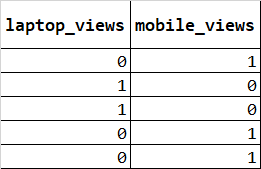

2. Use the above query as an inline query (FROM clause) and sum both views

```sql
SELECT SUM(laptop_views) AS laptop_views, SUM(mobile_views) AS mobile_views
FROM (
  SELECT 
    CASE WHEN device_type = 'laptop' THEN 1 ELSE 0 END AS laptop_views,
    CASE WHEN device_type IN ('phone', 'tablet') THEN 1 ELSE 0 END AS mobile_views
  FROM viewership) AS views
```

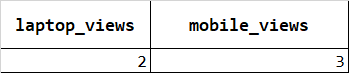

### 6. [Average Post Hiatus - Facebook](https://datalemur.com/questions/sql-average-post-hiatus-1)

Given a table of Facebook posts, for each user who posted at least twice in 2021, write a query to find the number of days between each user’s first post of the year and last post of the year in the year 2021. Output the user and number of the days between each user's first and last post.

``posts`` table
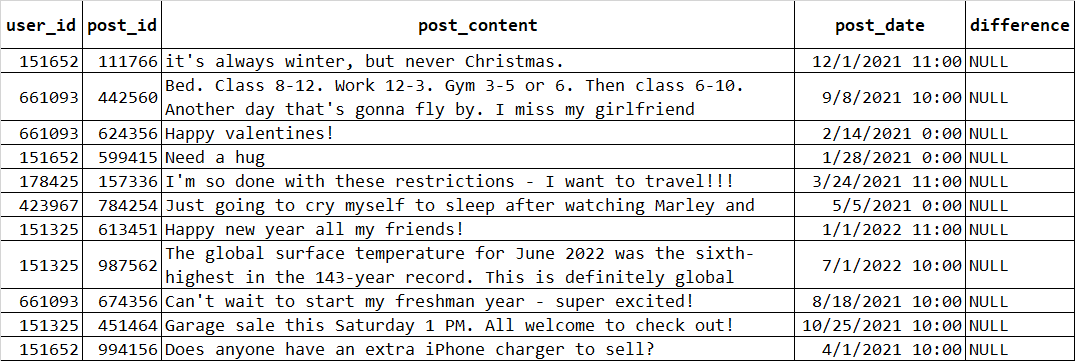

### Solution 1 
Cast the ``post_date`` to DATE then get the difference between the MAX and MIN dates. Then filter to year 2021 and where number of ``post_id`` is > 1

```sql
SELECT 
	user_id, 
  MAX(CAST(post_date AS DATE)) - MIN(CAST(post_date AS DATE)) AS days_between
FROM posts
WHERE DATE_PART('year', post_date) = 2021 
GROUP BY user_id
HAVING COUNT(post_id) > 1;
```

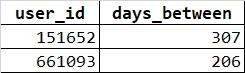

### Solution 2

1. Use window function LEAD on ``post_date`` to get the subsequent row as ``next_post_date``. Then filter to year 2021

```sql
SELECT 
  user_id, 
  post_id, 
  post_date, 
  LEAD(post_date) OVER (PARTITION BY user_id ORDER BY post_date) AS next_post_date
FROM posts
WHERE DATE_PART('year', post_date) = 2021
ORDER BY 1, 3
```

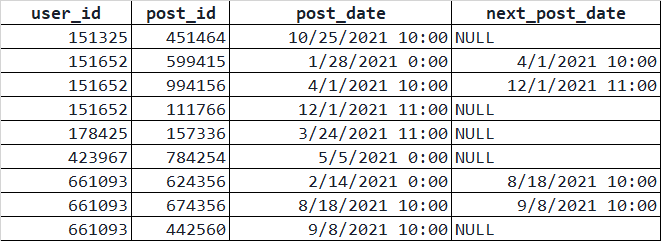

2. Use the above query as an inline query (FROM clause) and sum the days between ``next_post_date`` and ``post_date``. Then filter where ``next_post_date`` is not null.

```sql
SELECT
user_id,
SUM(DATE_PART('day', next_post_date - post_date)) AS days_between
FROM (
  SELECT 
    user_id, 
    post_id, 
    post_date, 
    LEAD(post_date) OVER (PARTITION BY user_id ORDER BY post_date) AS next_post_date
  FROM posts
  WHERE DATE_PART('year', post_date) = 2021
  ORDER BY 1, 3) AS user_post_2021
WHERE next_post_date IS NOT NULL
GROUP BY 1
```

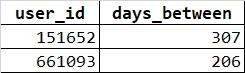
